# Text Mining

Text mining is a part of Natural Language Processing, or NLP, and it shows 'real feelings' from users and customers in word or sentences forms, whent they leave comments on product websites, social media like Twitter or blogs. Reviews and comments provide another useful application for merchants to evaluate if customers are satisfied with products or services rather than numerical data, such as ratings but more difficult to deal with. 

I am going to conduct sentiment analysis from user reviews in Google Play Store as an example to show how text mining will work. This dataset contains 60K+ user reviews from all apps in Google Play Store, and I will extract information and relation from reviews and sentiment (positive, neutral or negative) and use some prediction models to see how good a computer will recognize 'feelings' from text documents, or unstructured data.

Let's import some packges in the beginning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Now import the dataset and start EDA:

In [2]:
google_review=pd.read_csv('googleplaystore_user_reviews.csv')
google_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Well, it seems that some null values are existed in the dataset. Let's check the number:

In [3]:
count_of_null_value=google_review.isnull().sum()

print('Total number of observations: ', len(google_review))
print('Counts of null values: ', '\n', count_of_null_value)

Total number of observations:  64295
Counts of null values:  
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


Although the ratio of null values is quite high, we stiil need to remove these data, since it is meaningless to analyze users' sentiment without any comment left for the app. Now delete these null values:

In [4]:
google_review.dropna(axis=0, inplace=True)
google_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [5]:
google_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Uh...I think it will be a good start to compare relations between reviews and sentiment in the dataset. 

In [6]:
sentiment_data=pd.concat([google_review.Translated_Review, google_review.Sentiment], axis=1)
sentiment_data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [7]:
sentiment_data.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

Apply sentients with numerical variables:

In [8]:
sentiment_data['Sentiment']=sentiment_data['Sentiment'].map({'Positive':0, 'Negative':1, 'Neutral':2})

sentiment_data.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

Many users left positive comments. Now we pull out 1 review as the example to demonstrate how text mining will work and then apply the same steps to all documents. I will use nltk package to process the dataset.

# Steps for Text Mining

1. Remove punctuations and lowercase all words

In [9]:
import re

first_sample=sentiment_data.Translated_Review[9]
sample = re.sub("[^a-zA-Z]"," ",first_sample)#remove punctuations
sample
sample = sample.lower()
print("[{}] convert to \n[{}]".format(first_sample,sample))

[It helpful site ! It help foods get !] convert to 
[it helpful site   it help foods get  ]


2. Tokenize and remove stop words (eg. it, with, on, of, etc)

In [10]:
import nltk
from nltk.corpus import stopwords

sample=nltk.word_tokenize(sample)#tokenize

sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample)

['helpful', 'site', 'help', 'foods', 'get']


3. Lemmatization: covert words to a stem

In [11]:
lemma=nltk.WordNetLemmatizer()  
sample=[lemma.lemmatize(word) for word in sample]
sample=" ".join(sample)
sample

'helpful site help food get'

Now apply all steps above to the whole dataset:

In [12]:
review_list=[]
for i in sentiment_data.Translated_Review:
    review=re.sub("[^a-zA-Z]"," ",i)
    review=review.lower()
    review=nltk.word_tokenize(review)
    review=[word for word in review if not word in set(stopwords.words('english'))]
    lemma=nltk.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review]
    review=" ".join(review)
    review_list.append(review)
    
review_list[:5]

['like eat delicious food cooking food case best food help lot also best shelf life',
 'help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

Now we have a bag of words and need to count the word frequency in the dataset:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000

count_of_vectors=CountVectorizer(max_features=max_features)
sparce_matrix=count_of_vectors.fit_transform(review_list).toarray()
all_words=count_of_vectors.get_feature_names()
print('The 50 Most Common Words: ', all_words[0:50])

The 50 Most Common Words:  ['ability', 'able', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'adobe', 'advert', 'advertisement', 'age', 'ago', 'alarm', 'alert', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'android', 'angry', 'anime', 'annoying', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'app', 'appear']


Cool!!! Now we have a list ordered by word frequency and will move to the next step: sentiment prediction.

# Sentiment Prediction: Classification

Here we are going to train the computer to connect 'words' with 'feelings'. 3 models will be applied: Naive Bayse Classifier, Random Forest and Logistic Regression. First, split the data to training and test sets:

In [14]:
from sklearn.model_selection import train_test_split

y = sentiment_data.iloc[:,1].values
x= sparce_matrix

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

## 1. Gaussian Naive Bayse

In [15]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
model_nb=nb.fit(x_train, y_train)
acc_nb=nb.score(x_test, y_test)
print('Accuracy for Naive Bayse: ', round(acc_nb, 3))

Accuracy for Naive Bayse:  0.576


Confusion Matrix:

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

nb_pred=nb.predict(x_test)
cm_nb=confusion_matrix(y_test, nb_pred)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64      6043
           1       0.53      0.59      0.56      2007
           2       0.32      0.91      0.47      1307

   micro avg       0.58      0.58      0.58      9357
   macro avg       0.58      0.67      0.56      9357
weighted avg       0.74      0.58      0.60      9357



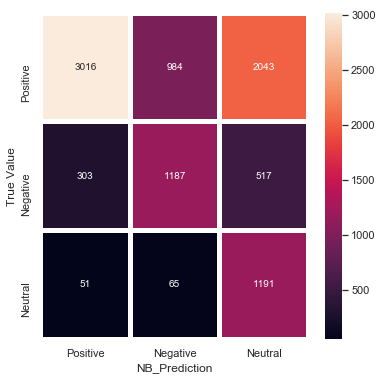

In [17]:
name=['Positive', 'Negative', 'Neutral']
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm_nb,annot=True,linewidth=4,fmt=".0f",ax=ax)
plt.xlabel('NB_Prediction')
plt.ylabel('True Value')
ax.set_xticklabels(name)
ax.set_yticklabels(name)
plt.show()

Some positve comments are categorized as neutral ones......Naive Bayse doesn't perform well, right?

## 2. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,random_state=42)
model_rf=rf.fit(x_train,y_train)
acc_rf=rf.score(x_test,y_test)
print('Accuracy for Random Forest: ', round(acc_rf, 3))

Accuracy for Random Forest:  0.89


Classification report and confusion matrix:

In [19]:
rf_pred=rf.predict(x_test)
cm_rf=confusion_matrix(y_test, rf_pred)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6043
           1       0.86      0.74      0.79      2007
           2       0.82      0.87      0.84      1307

   micro avg       0.89      0.89      0.89      9357
   macro avg       0.86      0.85      0.86      9357
weighted avg       0.89      0.89      0.89      9357



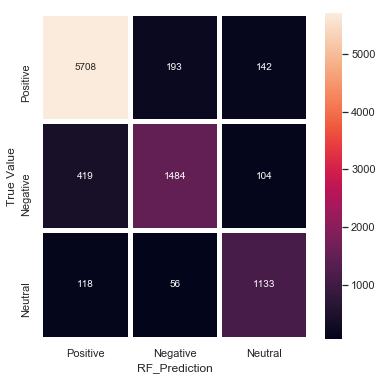

In [20]:
name=['Positive', 'Negative', 'Neutral']
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm_rf,annot=True,linewidth=4,fmt=".0f",ax=ax)
plt.xlabel('RF_Prediction')
plt.ylabel('True Value')
ax.set_xticklabels(name)
ax.set_yticklabels(name)
plt.show()

Much bettert!!! Less comments are grouped as neutral whereas they should be positive in Random Forest than Naive Bayse.

## 3. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
acc_lr=lr.score(x_test,y_test)
print('Accuracy for Logistic Regression: ', round(acc_lr, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy for Logistic Regression:  0.896


Classification report and confusion matrix:

In [22]:
lr_pred=lr.predict(x_test)
cm_lr=confusion_matrix(y_test, lr_pred)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6043
           1       0.84      0.78      0.81      2007
           2       0.79      0.90      0.84      1307

   micro avg       0.90      0.90      0.90      9357
   macro avg       0.86      0.87      0.86      9357
weighted avg       0.90      0.90      0.90      9357



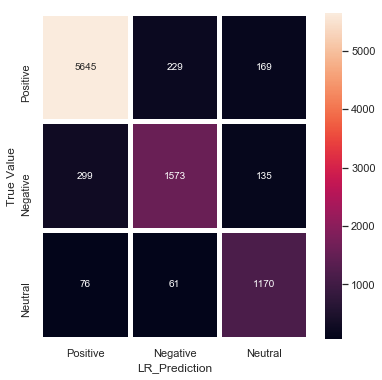

In [23]:
name=['Positive', 'Negative', 'Neutral']
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm_lr,annot=True,linewidth=4,fmt=".0f",ax=ax)
plt.xlabel('LR_Prediction')
plt.ylabel('True Value')
ax.set_xticklabels(name)
ax.set_yticklabels(name)
plt.show()

# Conclusion

Among 3 models, logistic performs the best, while Naive Bayse gave the lowest accuracy. This is not the end. One could connect this prediction and app in Google Play Store to see what app users like the most, what category of app Google Play Store should encourage developers to launch because of the potential and what app should leave the market.